# Assignment: 3
Submitted by: Jagmeet Singh

**Problem Description:** In this assignment, fake news are predicted from reddit website by looking at the title of the news. It is a sequential data problem.  

**Data Description:** The data in this problem is in the text format. Each data entry contains number of words which represents the title of the news. It is a labelled data with label as 1 or 0 which implies if the news is fake or not respectively. Number of words in each data entry varies as the title length changes. So the input to the model is the text data 'title of the news' and output of the model is the prediction whether the give titled news is fake or not.

**Preprocessing:** To convert the text data to the numeric form so that it can be trained on some model, tokenizer package and pad_sequence function is used. Before that, the stop words are removed and the words are stemmed using tlnk package. 

* The training data given has y_label as 0,1 or 2. The label "2" is not the accurate labels as the final output can be 0 or 1 only. I removed those entries with label as 2 (total 232 data entries)

**Models Trained:** The assignment focuses on using Gate Recurrent Network (GRU) and Long Term Short Memory (LSTM) to analyze the sequential data. The input data needs to be mapped to numeric values that can be understood by the model. The main challenges would be preprocessinf of the data and build a good LSTM/GRU model and tuning its parameters. 

In [ ]:
#Mounting google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing data using pandas library
import pandas as pd

xy_train_df = pd.read_csv('drive/My Drive/CISC873/A3/xy_train.csv')  #training data
x_test_df = pd.read_csv('drive/My Drive/CISC873/A3/x_test.csv')     #test data

In [ ]:
import numpy as np

#viewing the shape of the data
print(np.shape(xy_train_df))
print(np.shape(x_test_df))

(60000, 3)
(59151, 2)


**The training data contains 60000 data entries (news titles) with three columns (ID, news title and label) for each data entry. The test data contains 59151 data entries with two columns (ID and news title)**

In [ ]:
xy_train_df.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
x_test_df.head()

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"


In [ ]:
#Checking unique values of label and count
np.unique(xy_train_df['label'],return_counts=True)

(array([0, 1, 2]), array([32172, 27596,   232]))

In [ ]:
#removing data with label value = 2
xy_train_df = xy_train_df.drop(xy_train_df[xy_train_df.label == 2].index)

In [ ]:
#Checking unique values of label and count
np.unique(xy_train_df['label'],return_counts=True)

(array([0, 1]), array([32172, 27596]))

In [ ]:
#importing libraries

from tensorflow.keras.preprocessing.text import Tokenizer  #Tokenizer library to give each word a token 
from tensorflow.keras.preprocessing.sequence import pad_sequences  #To convert tokenized array to a 2D array
from sklearn.model_selection import train_test_split  # to make train-validation split
from pprint import pprint

In [ ]:
#functions to plot learning curves
#Plotting the learning curves
#Plotting trained data accuracy and validation data accuracy
import matplotlib.pyplot as plt

def acc_plot(history):
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

#Plotting trained data and validation loss
def loss_plot(history):
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


In [ ]:
vocab_size = 40000    #defining the size of vocabulary words
max_len = 60          #defining the maximum length of each title #final tuning

In [ ]:
#training x and y data
x = xy_train_df.text   #the text data (titles)
y = xy_train_df.label  #(the label data)

In [ ]:
#importing libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import collections      #specialized container datatypes for list, tuple, set alternative
import matplotlib.pyplot as plt   #for plotting
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.compat.v1.keras.layers import CuDNNGRU #Fast GRU implementation backed by cuDNN

import tensorflow as tf
from tensorflow.keras.optimizers import Adam     #Optimizer
from keras.layers import LSTM, GRU


#Early stopping definition
#The parameter to monitor is validation loss
#Upto 5 epochs are checked to see the improvement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)


* -----------------

In [ ]:
#splitting training data as train and validation data with the given ratio as test_size
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1)

In [ ]:
# build vocabulary from training set
#Each word is assigned a number 
#tokenizer build vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train) #vocab based on words in training data

In [ ]:
tokenizer.index_word

In [ ]:
#checking the no. of words in tokenozer
tokenizer.num_words

40000

In [ ]:
tokenizer.word_counts

In [ ]:
#Method which assigns integer value to each word in the sequence based on vocabulary 
#and then transforms into a matrix using pad_sequences

#pad_sequences transforms a list of sequences 
#into a 2D Numpy array of shape (num_samples, num_timesteps).
def _preprocess(list_of_text):  #private method
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),  #transforms each text in texts to sequence of integers
        maxlen=max_len,    #maximum length of all sequences
        padding='post',    #specifying padding after sequence
    )

In [ ]:
# padding is done inside: 
x_train = _preprocess(x_train)
x_valid = _preprocess(x_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(42000, 40) (42000,)
(18000, 40) (18000,)


In [ ]:
x_train[0]

array([ 1450,   559,  3754,   703,   185,     2, 10598,     3,   831,
           2, 16944,  8010,    73, 20825,  5321,    45,    14,    17,
         124,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

In [ ]:
#printing the sequence from the preproces sequence using sequences to texts
pprint(tokenizer.sequences_to_texts(x_train[0:5]))


['saudi civil defence members use a forklift to move a 610 kg 1 345 lbs man '
 'from his house',
 'driving past this my 11yo just asked 鈥渨hat are 鈥楪od people鈥欌€ and now i '
 'can鈥檛 not read it that way',
 'the 2020 presidential debate match ups are set which candidates will face '
 'off in miami',
 'update pt 2 adopted us air force col found his japanese birth mother and '
 'gained a brother as well',
 "a queen's guard finds himself in the middle of v j day in times square "
 'august 14 1945']


In [ ]:
_preprocess(['saudi defence house 345'])

array([[ 1450,  3754,   124, 20825,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]], dtype=int32)

In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


# Fully Connected Neural Network

In [ ]:
seq_in = keras.Input(batch_shape=(None, max_len))  #Input Layer with shape: [None,40]

#Embedding: Turns positive integers (indexes) into dense vectors of fixed size(100 here).
#Each index is mapped to array of length 100
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(seq_in)   #Embedded Layer Output Shape: [None, 40,100]

#Reduce mean: Computes the mean of elements across dimensions of a tensor
averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,100]

#fully connected dense layer with sigmoid layer
pred = keras.layers.Dense(1, activation='sigmoid')(averaged) #Output Shape [None, 1]

#Building the model
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

In [ ]:
#Summary of model
model.summary()

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 40)]              0         
_________________________________________________________________
embedding_29 (Embedding)     (None, 40, 100)           4000000   
_________________________________________________________________
tf_op_layer_Mean_15 (TensorF [(None, 100)]             0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 101       
Total params: 4,000,101
Trainable params: 4,000,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model
model.compile(
    optimizer=Adam(),    #optimizer
    loss='binary_crossentropy',  #loss
    metrics=['accuracy', 'AUC']  #evaluation metrics
)


#fitting model
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/10
561/561 [==============================] - 35s 62ms/step - loss: 0.5897 - accuracy: 0.7209 - auc: 0.8294 - val_loss: 0.4940 - val_accuracy: 0.7834 - val_auc: 0.8697
Epoch 2/10
561/561 [==============================] - 34s 60ms/step - loss: 0.4174 - accuracy: 0.8261 - auc: 0.9054 - val_loss: 0.4302 - val_accuracy: 0.7998 - val_auc: 0.8843
Epoch 3/10
561/561 [==============================] - 33s 59ms/step - loss: 0.3399 - accuracy: 0.8594 - auc: 0.9350 - val_loss: 0.4187 - val_accuracy: 0.8038 - val_auc: 0.8884
Epoch 4/10
561/561 [==============================] - 34s 60ms/step - loss: 0.2912 - accuracy: 0.8834 - auc: 0.9524 - val_loss: 0.4256 - val_accuracy: 0.8032 - val_auc: 0.8883
Epoch 5/10
561/561 [==============================] - 34s 61ms/step - loss: 0.2543 - accuracy: 0.9008 - auc: 0.9638 - val_loss: 0.4356 - val_accuracy: 0.8019 - val_auc: 0.8862
Epoch 6/10
561/561 [==============================] - 34s 61ms/step - loss: 0.2242 - accuracy: 0.9142 - auc: 0.9720 - va

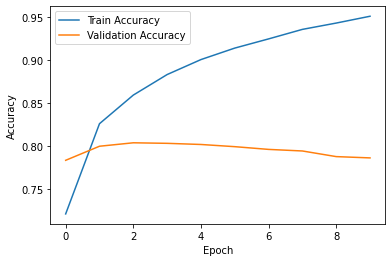

In [ ]:
acc_plot(history)

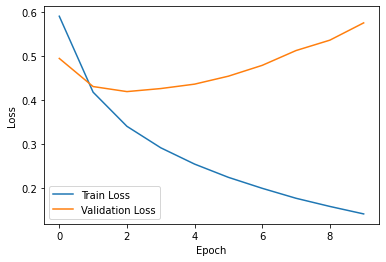

In [ ]:
loss_plot(history)

In [ ]:
#Predicting for test data

#Preprocessing
x_test = _preprocess(x_test_df.text)

#Prediting and converting to 1-D array
y_predict = np.squeeze(model.predict(x_test))

#Saving the data to csv
pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('sample_submission.csv', index=False)

* **The training is too bad for the above fully connected network. It is totally over training as the training accuracy is increasing while validation accuracy decreases. The model is tuned below by introducing dropouts and other parameter changes.**

# Tuning Fully Connected Network

In [ ]:
drop1 =  tf.keras.layers.Dropout(.5)
drop2 =  tf.keras.layers.Dropout(.5)

In [ ]:
seq_in = keras.Input(batch_shape=(None, max_len))  #Input Layer with shape: [None,40]

#Embedding: Turns positive integers (indexes) into dense vectors of fixed size(100 here).
#Each index is mapped to array of length 100
embedded = keras.layers.Embedding(tokenizer.num_words, 75)(seq_in)   #Embedded Layer Output Shape: [None, 40,75]

#Reduce mean: Computes the mean of elements across dimensions of a tensor
averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,75]
fc1 = keras.layers.Dense(32,activation='relu')(averaged)  #Output Shape: [None, 32]
drp1 = drop1(fc1, training= True) #dropout layer
#fully connected dense layer with sigmoid layer
pred = keras.layers.Dense(1, activation='sigmoid')(drp1)   #Output Shape: [None, 1]

#Building the model
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

In [ ]:
#Summary of model
model.summary()

Model: "functional_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 40)]              0         
_________________________________________________________________
embedding_28 (Embedding)     (None, 40, 75)            3000000   
_________________________________________________________________
tf_op_layer_Mean_14 (TensorF [(None, 75)]              0         
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2432      
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 3,002,465
Trainable params: 3,002,465
Non-trainable params: 0
___________________________________________

In [ ]:


#Compiling the model
model.compile(
    optimizer=tf.optimizers.Adamax(),    #optimizer
    loss='binary_crossentropy',  #loss
    metrics=['accuracy', 'AUC']  #evaluation metrics
)


#fitting model
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/10
1121/1121 [==============================] - 46s 41ms/step - loss: 0.6804 - accuracy: 0.5613 - auc: 0.6256 - val_loss: 0.6503 - val_accuracy: 0.6333 - val_auc: 0.7624
Epoch 2/10
1121/1121 [==============================] - 46s 41ms/step - loss: 0.5821 - accuracy: 0.7226 - auc: 0.8037 - val_loss: 0.5255 - val_accuracy: 0.7474 - val_auc: 0.8290
Epoch 3/10
1121/1121 [==============================] - 46s 41ms/step - loss: 0.4866 - accuracy: 0.7741 - auc: 0.8532 - val_loss: 0.4846 - val_accuracy: 0.7666 - val_auc: 0.8469
Epoch 4/10
1121/1121 [==============================] - 47s 42ms/step - loss: 0.4478 - accuracy: 0.7952 - auc: 0.8740 - val_loss: 0.4646 - val_accuracy: 0.7767 - val_auc: 0.8595
Epoch 5/10
1121/1121 [==============================] - 46s 41ms/step - loss: 0.4251 - accuracy: 0.8115 - auc: 0.8872 - val_loss: 0.4533 - val_accuracy: 0.7850 - val_auc: 0.8667
Epoch 6/10
1121/1121 [==============================] - 47s 42ms/step - loss: 0.4032 - accuracy: 0.8231 - auc:

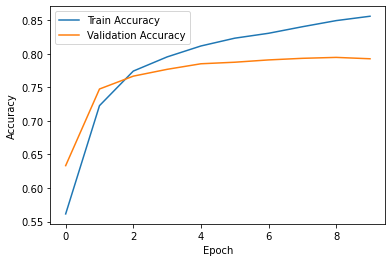

In [ ]:
acc_plot(history)

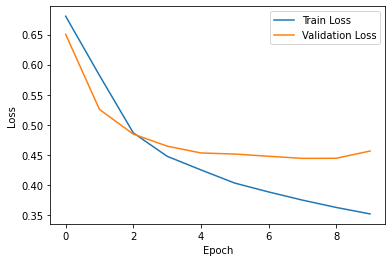

In [ ]:
loss_plot(history)

* **Till now the above model is the best that has been obtained in terms of learning curves and accuracy. Though the accuracy is not that high on the test data available. LSTM/GRU models are implemented below for better performance.**

In [ ]:
#preprocessing on test data
#x_test = _preprocess(x_test_df.text)

#predicting the result
y_predict = np.squeeze(model.predict(x_test))


pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('sub_fc_2.csv', index=False)

# Preprocessing

* **Removing Stop Words from the data**

In [ ]:
#Stop Words removal(a, the, an, for etc.)

#importing nltk package
import nltk
from nltk.corpus import stopwords

In [ ]:
#downloadin stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#making a set of stop words
stopwords=set(stopwords.words('english'))

In [ ]:
#method to remove stop words from the data
def rem_stopwords(data):
    out_array=[]  #empty array
    for sentence in data:   #for each sentence (array) in the data
        tmp_list=[]         #temporary empty array
        for word in sentence.split():  #splitting the words in the sentence
            if word.lower() not in stopwords:   #lower each word and check if it is not in stop words
                tmp_list.append(word)    # if it is not the word is append to temp array
        out_array.append(' '.join(tmp_list))  #joint the array to form a string of words sentence
    return out_array #return complete array without stop words


In [ ]:
#removing stop words from the complete data (train)
x_filtered = rem_stopwords(x)

In [ ]:
#filtered data after removing stop words
x_filtered[0][0:20]

'group friends began '

In [ ]:
#unfiltered data before removing stop words
x[0][0:20]

'A group of friends b'

In [ ]:
np.shape(x_filtered)

(59768,)

* **Stemming the words**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# importing modules 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer()  #making an instance of PorterStemmer 

In [ ]:
#checking word_tokenize
sentence = "Programers program with programing languages"
words = word_tokenize(sentence) 

In [ ]:
words

['Programers', 'program', 'with', 'programing', 'languages']

In [ ]:
#method to stem words from the data
def stm_stopwords(data):
    out_array=[]  #empty array
    for sentence in data:   #for each sentence (array) in the data
        tmp_list=[]         #temporary empty array
        for word in sentence.split():  #splitting the words in the sentence
              wrd = ps.stem(word)  #stemming
              tmp_list.append(wrd)    # stemmed word is append to temp array
        out_array.append(' '.join(tmp_list))  #joint the array to form a string of words sentence
    return out_array #return complete array without stop words

In [ ]:
#stemming words after removing stop words
x_filtered = stm_stopwords(x_filtered)

In [ ]:
#Checking stemming
x_filtered[1][0:20]

'british prime minist'

In [ ]:
x[1][0:20]

'British Prime Minist'

In [ ]:
#splitting training data as train and validation data with the given ratio as test_size
x_train, x_valid, y_train, y_valid = train_test_split(x_filtered, y, test_size=0.2)

In [ ]:
# build vocabulary from training set
#Each word is assigned a number 
#tokenizer build vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train) #vocab based on words in training data

In [ ]:
#Method which assigns integer value to each word in the sequence based on vocabulary 
#and then transforms into a matrix using pad_sequences

#pad_sequences transforms a list of sequences 
#into a 2D Numpy array of shape (num_samples, num_timesteps).
def _preprocess(list_of_text):  #private method
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),  #transforms each text in texts to sequence of integers
        maxlen=max_len,    #maximum length of all sequences
        padding='post',    #specifying padding after sequence
    )

In [ ]:
# padding is done inside: 
#preprocess method to tokenized the words and converting it into 2D array
x_train = _preprocess(x_train)
x_valid = _preprocess(x_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(47814, 60) (47814,)
(11954, 60) (11954,)


# Single GRU implementation

In [ ]:
#Early stopping definition
#The parameter to monitor is validation loss
#Upto 5 epochs are checked to see the improvement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import GRU

In [ ]:
#model Building
seq_in = keras.Input(batch_shape=(None, max_len))  #Output Shape: [None, 40]
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(seq_in)  #Output Shape: [None, 40, 100]
#Reduce mean: Computes the mean of elements across dimensions of a tensor
#averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,100]
gru1 = GRU(75)(embedded)                         #first GRU layer with 75 units(dimension of output) Output Shape: [None, 75]
pred = keras.layers.Dense(1, activation='sigmoid')(gru1) #final Dense layer Output Shape: [None, 1]

#building the model
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

#printing the summary
model.summary()


Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 40)]              0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 40, 100)           4000000   
_________________________________________________________________
gru (GRU)                    (None, 75)                39825     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 76        
Total params: 4,039,901
Trainable params: 4,039,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)


#fitting the model
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_valid, y_valid),callbacks=[callback],
                    verbose=1)

Epoch 1/20
561/561 [==============================] - 56s 100ms/step - loss: 0.6912 - accuracy: 0.5355 - auc: 0.4905 - val_loss: 0.6898 - val_accuracy: 0.5421 - val_auc: 0.4997
Epoch 2/20
561/561 [==============================] - 55s 98ms/step - loss: 0.6579 - accuracy: 0.5826 - auc: 0.6133 - val_loss: 0.5252 - val_accuracy: 0.7443 - val_auc: 0.8191
Epoch 3/20
561/561 [==============================] - 56s 99ms/step - loss: 0.4199 - accuracy: 0.8057 - auc: 0.8862 - val_loss: 0.4073 - val_accuracy: 0.8096 - val_auc: 0.8944
Epoch 4/20
561/561 [==============================] - 56s 100ms/step - loss: 0.2514 - accuracy: 0.8950 - auc: 0.9608 - val_loss: 0.4784 - val_accuracy: 0.8084 - val_auc: 0.8871


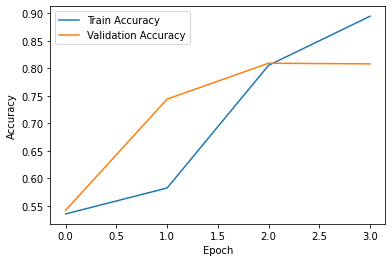

In [ ]:
#plotting accuracy curves
acc_plot(history)

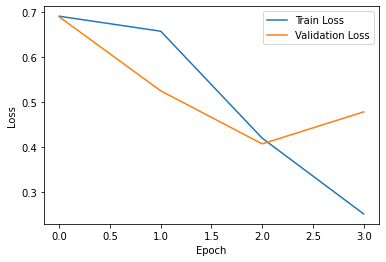

In [ ]:
#plotting loss curves
loss_plot(history)

* The training stop after few epochs as early stopping is implemented. The learning curves are not well consistent but still not a bad model.

In [ ]:
#Predicting on test data

#removing stop words from test data
x_test = rem_stopwords(x_test_df.text)
#stemming the words
x_test = stm_stopwords(x_test)

#preprocessing the data
x_test = _preprocess(x_test)

#predicting and converting to 1D array
y_predict = np.squeeze(model.predict(x_test))


pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('gru1.csv', index=False)

# Single LSTM implementation

In [ ]:
from keras.layers import LSTM

In [ ]:
#model Building
seq_in = keras.Input(batch_shape=(None, max_len)) #Output SHape: [None, 40]
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(seq_in) #output Shape: [None, 40, 100]
#Reduce mean: Computes the mean of elements across dimensions of a tensor
#averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,100]
lstm1 = LSTM(100)(embedded)                      #LSTM layer with 100 units Output Shape: [None, 100]
fc1 = tf.keras.layers.Dense(32, activation='relu')(lstm1)  #Output Shape: [None, 32]
pred = keras.layers.Dense(1, activation='sigmoid')(fc1)   #final Dense layer Output Shape: [None, 1]

#building model
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

#printing summary
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 40, 100)           4000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 4,083,665
Trainable params: 4,083,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)



#fitting the model
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_valid, y_valid),#callbacks=[callback],
                    verbose=1)

Epoch 1/10
561/561 [==============================] - 69s 122ms/step - loss: 0.5562 - accuracy: 0.6839 - auc: 0.7683 - val_loss: 0.4364 - val_accuracy: 0.7941 - val_auc: 0.8799
Epoch 2/10
561/561 [==============================] - 67s 120ms/step - loss: 0.2346 - accuracy: 0.9036 - auc: 0.9656 - val_loss: 0.5431 - val_accuracy: 0.7920 - val_auc: 0.8717
Epoch 4/10
561/561 [==============================] - 68s 122ms/step - loss: 0.1643 - accuracy: 0.9316 - auc: 0.9827 - val_loss: 0.5848 - val_accuracy: 0.7796 - val_auc: 0.8578
Epoch 5/10
561/561 [==============================] - 67s 120ms/step - loss: 0.1206 - accuracy: 0.9507 - auc: 0.9899 - val_loss: 0.7758 - val_accuracy: 0.7759 - val_auc: 0.8477
Epoch 6/10
561/561 [==============================] - 68s 121ms/step - loss: 0.0830 - accuracy: 0.9683 - auc: 0.9947 - val_loss: 0.8875 - val_accuracy: 0.7661 - val_auc: 0.8352
Epoch 7/10
561/561 [==============================] - 68s 122ms/step - loss: 0.0621 - accuracy: 0.9791 - auc: 0.996

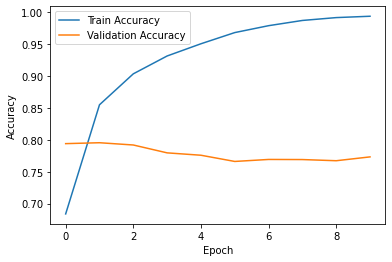

In [ ]:
acc_plot(history)

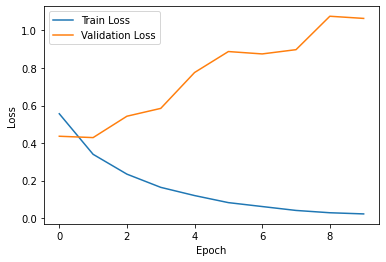

In [ ]:
loss_plot(history)

* The model is clearly bad trained and overfitted.

In [ ]:
x_test = rem_stopwords(x_test_df.text)
x_test = stm_stopwords(x_test)

x_test = _preprocess(x_test)
y_predict = np.squeeze(model.predict(x_test))


pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('sub_lstm2.csv', index=False)

# Multilayer GRU/LSTMs

In [ ]:
#model Building
seq_in = keras.Input(batch_shape=(None, max_len)) #Output SHape: [None, 40]
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(seq_in) #OUtput Shape: [None, 40, 100]
#Reduce mean: Computes the mean of elements across dimensions of a tensor
#averaged = tf.reduce_mean(embedded, axis=1)    #Output Shape: [None,100]
gru1 = GRU(80,return_sequences=True)(embedded) #to return output for each cell of GRU Output Shape: [None, 40, 80]
gru2 = GRU(80)(gru1)                           #second layer Output Shape: [None, 80]
fc1 = tf.keras.layers.Dense(64, activation='relu')(gru2)  #Output Shape: [None, 64]
pred = keras.layers.Dense(1, activation='sigmoid')(fc1) #final dense layer Output Shape: [None, 1]

#Defining model with inputs and outputs
model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

#printing summary of the model
model.summary()

Model: "functional_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 40, 100)           4000000   
_________________________________________________________________
gru_6 (GRU)                  (None, 40, 80)            43680     
_________________________________________________________________
gru_7 (GRU)                  (None, 80)                38880     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                5184      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 4,087,809
Trainable params: 4,087,809
Non-trainable params: 0
___________________________________________

In [ ]:
#Compiling the model, specifying optimizer, loss, metrices 
model.compile(
    optimizer=tf.optimizers.RMSprop() ,
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)



history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/10
654/654 [==============================] - 74s 113ms/step - loss: 0.3432 - accuracy: 0.8514 - auc: 0.9265 - val_loss: 0.4056 - val_accuracy: 0.8121 - val_auc: 0.8993
Epoch 2/10
654/654 [==============================] - 73s 112ms/step - loss: 0.3073 - accuracy: 0.8700 - auc: 0.9413 - val_loss: 0.4296 - val_accuracy: 0.8148 - val_auc: 0.8983
Epoch 3/10
654/654 [==============================] - 73s 112ms/step - loss: 0.2706 - accuracy: 0.8884 - auc: 0.9545 - val_loss: 0.4199 - val_accuracy: 0.8097 - val_auc: 0.8955
Epoch 4/10
654/654 [==============================] - 75s 114ms/step - loss: 0.2345 - accuracy: 0.9051 - auc: 0.9656 - val_loss: 0.4497 - val_accuracy: 0.8113 - val_auc: 0.8937
Epoch 5/10
654/654 [==============================] - 72s 110ms/step - loss: 0.1979 - accuracy: 0.9225 - auc: 0.9751 - val_loss: 0.4461 - val_accuracy: 0.8063 - val_auc: 0.8908
Epoch 6/10
654/654 [==============================] - 72s 110ms/step - loss: 0.1656 - accuracy: 0.9372 - auc: 0.982

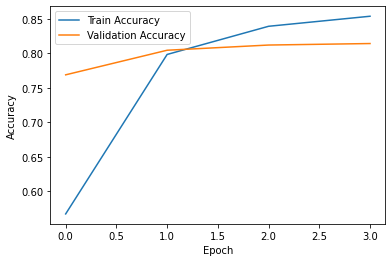

In [ ]:
acc_plot(history)

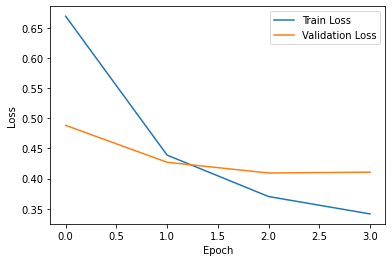

In [ ]:
loss_plot(history)

* The loss keep increasing for validation which state clear overfitting.

In [ ]:
x_test = rem_stopwords(x_test_df.text)
x_test = stm_stopwords(x_test)

x_test = _preprocess(x_test)
y_predict = np.squeeze(model.predict(x_test))


pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('sub_gru9.csv', index=False)

# Bidirectional GRUs/LSTMs

In [ ]:
import tensorflow as tf

tf.random.set_seed(0)
drop1 = tf.keras.layers.Dropout(.2)

In [ ]:
#Bidirectional Model: propagates the input forward and backwards through the RNN layer and then concatenates the final output
#None represents the batch_size

#model Building
seq_in = keras.Input(batch_shape=(None, max_len)) #[(None, 60)]
embedded = keras.layers.Embedding(tokenizer.num_words, 150)(seq_in) #(None, 60, 150)
gru1 = tf.keras.layers.Bidirectional(LSTM(50, dropout=0.1,return_sequences=True))(embedded) #Bidirectional with 50 units, Output Shape: [None, 60, 100] 
gru2 = tf.keras.layers.Bidirectional(LSTM(50, dropout=0.1,return_sequences=True))(gru1) #Bidirectional with 50 units, Output Shape: [None, 60, 100] 
gru3 = tf.keras.layers.Bidirectional(LSTM(50, dropout=0.1))(gru2) #Bidirectional with 50 units, Output Shape: [None, 100]
fc1 = tf.keras.layers.Dense(40, activation='relu')(gru3)#drp1 = drop1(fc1, training=True) (None, 40)
pred = keras.layers.Dense(1, activation='sigmoid')(fc1)  #Output Shape: [None, 1] 

model = keras.Model(
    inputs=seq_in,
    outputs=pred,
)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 60, 150)           6000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 100)           80400     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 60, 100)           60400     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)


#fitting the model
history = model.fit(x_train,
                    y_train,
                    epochs=1,
                    batch_size=32,
                    validation_data=(x_valid, y_valid),
                    callbacks=[callback],
                    verbose=1)

1495/1495 [==============================] - 365s 244ms/step - loss: 0.4414 - accuracy: 0.7883 - auc: 0.8733 - val_loss: 0.3910 - val_accuracy: 0.8237 - val_auc: 0.9052


In [ ]:
#Removing step words from test data
x_test = rem_stopwords(x_test_df.text)
#Stemming words
x_test = stm_stopwords(x_test)

#Preprocessing
x_test = _preprocess(x_test)

#Predicting and converting to 1-D array
y_predict = np.squeeze(model.predict(x_test))


pd.DataFrame(
    {'id': x_test_df.index,
     'label':y_predict}).to_csv('sub_gru2_bi6.csv', index=False)

* **The above model is the best that has been obtained in terms of train, validation and test accuracy.**

# Questions:

## Ques 1: What is the main difference between GRU and LSTM?

Ans: GRU and LSTM are similar to each other with respect to solving the long sequence memory problem . Both were created to solve the problem created by Recurrent neural network like vanishing gradient, exploding gradient. LSTM was created before GRU. 
* LSTM has two hidden memory states named as Long-term memory and Short-term memory.
* GRU has two inputs: input state and memory state while LSTM has three inputs: input state, forget state and output state.
* GRU has less number of gates as compared to LSTM which implies less training parameters and thus are more time efficient. 

## Ques 2: What is the default model in the template? Is it a good one for sequential data? Why?

Ans: The default model in the template is the fully connected neural network with embedding layer in the beginning. It is not a good model for the sequential data as it fails to incorporate the memory dependence. Also fully connected neural netowork are limited to fixed length. 
* In sequential data, every data entry is somehow related to the previous data entries. Recurrent neural network give a solution to such a problem because of a memory term associated with RNN and its other variants like GRU, LSTM etc.

## Ques 3: What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

Ans: **Gradient Vanishing:** In Vanilla recurrent neural network, the long one travel back the sequence, the gradient becomes smaller and smaller as described by chain rule. This results in learning the terms that are much near to the end of the sequence and thus the weight or importance of the previous terms becomes very less which makes it not a good model.

**Gradient Explosion:** Gradient explosion is a problem in neural networks where the gradient keep increasing during back-propagation alongside the sequence as given by chain rule. As the gradient increases, the parameter that need to be changed gets very high value results in NaN (overflow error) and thus results in a unstable neural network for predictions.

**GRU/LSTM:** Vanilla RNN are unable to capture the dependencies along the sequence and also resutls in vanishing and exploding gradient. To solve this problem, GRU/LSTM implements a method to properly capture the lon-term dependencies and memory of the sequences. 
* LSTM implements input, forget and output gates. The input gate regulates the amount of new information to be added to the model, the forget gate regulates how much of previous state information to be forget and the output gate regulate the information to be output for the next layer. 

* GRU is similar to LSTM but with two gates: reset gate and update gate. GRU has less parameters and are more time efficient.

# Downloading file

In [ ]:
!sudo apt-get install texlive-xetex

In [ ]:
!jupyter nbconvert --to pdf CISC873_A3_Jagmeet.ipynb

[NbConvertApp] Converting notebook CISC873_A3_Jagmeet.ipynb to pdf
[NbConvertApp] Support files will be in CISC873_A3_Jagmeet_files/
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A3_Jagmeet_files
[NbConvertApp] Writing 116631 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, mo